# Classification of Text Documents using Naive Bayes
Naive Bayes is a classification methods in machine learnig and nlp which likelihood of word occuring using Bayes theorem 

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2. Importing Dataset

In [2]:
!wget https://raw.githubusercontent.com/fatahrahimi330/100-Machine-Learning-Projects/refs/heads/master/3-Text-Document-Classification/synthetic_text_data.csv

--2026-03-01 09:24:37--  https://raw.githubusercontent.com/fatahrahimi330/100-Machine-Learning-Projects/refs/heads/master/3-Text-Document-Classification/synthetic_text_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8059 (7.9K) [text/plain]
Saving to: ‘synthetic_text_data.csv’

synthetic_text_data 100%[===================>]   7.87K  --.-KB/s    in 0s      

2026-03-01 09:24:37 (103 MB/s) - ‘synthetic_text_data.csv’ saved [8059/8059]



In [3]:
df = pd.read_csv('synthetic_text_data.csv')
df.head()

,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


In [4]:
X = df['text'].values
y = df['label'].values

## 3. Spliting the data into Training and Test Set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Text Preprocessing: Converting Text to Vector or Numeric Feature

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

## 5. Building and Training the Model

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

## 6. Making Prediction

In [13]:
y_pred = model.predict(x_test)

## 7. Evaluating the Model

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")
print(f"Confusion Metrics: \n{cm}")

Accuracy: 0.88
Confusion Metrics: 
[[2 0 0 0]
 [0 5 0 0]
 [0 0 2 1]
 [1 0 0 6]]


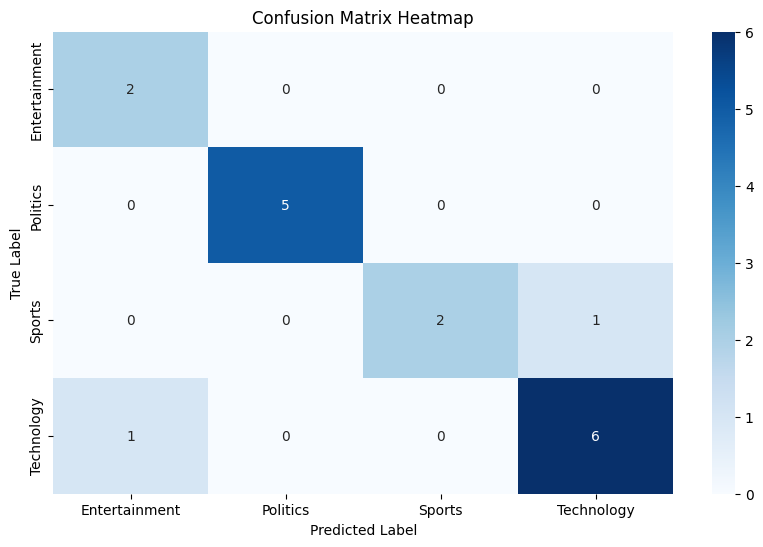

In [32]:
# Visualizing
plt.figure(figsize=(10, 6))
class_labels = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 8. Prediction on Unseen Data

In [36]:
user_input = ("I love artificial intelligence and machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.
